In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("white")

In [3]:
# get a csv data set to play with
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'

In [4]:
# Save thewinquality.csv file in the same folder as your ipython notebooks, note the delimiter used ;
df_wine = pd.read_csv('winequality-red.csv',sep=';')

In [10]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
# lets find out the average alcohol content for the wine
df_wine['alcohol'].mean()

10.422983114446502

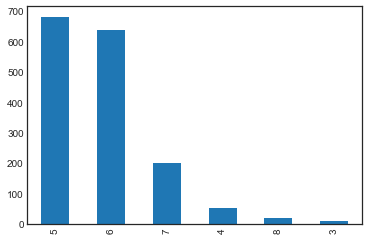

In [14]:
df_wine.quality.value_counts().plot(kind='bar')

### Group by one key

In [15]:
# Let's group the wines by "quality"
wino = df_wine.groupby('quality')

In [16]:
wino_df=wino.mean()

In [18]:
wino_df.alcohol

quality
3     9.955000
4    10.265094
5     9.899706
6    10.629519
7    11.465913
8    12.094444
Name: alcohol, dtype: float64

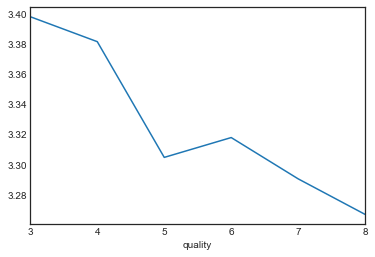

In [21]:
wino_df.pH.plot()

### Group by two keys

In [22]:
df = pd.read_csv('train.csv')

In [23]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [24]:
df.Survived.groupby([df.Pclass,df.Sex]).mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [25]:
mean=df.Survived.groupby([df.Pclass,df.Sex]).mean()

In [26]:
mean.unstack()

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


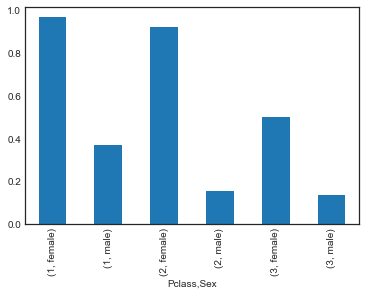

In [27]:
df.Survived.groupby([df.Pclass,df.Sex]).mean().plot.bar()

### Not only stats but also size( )

In [29]:
df.Survived.groupby([df.Pclass,df.Sex])

In [30]:
df.Survived.groupby([df.Pclass,df.Sex]).size()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Survived, dtype: int64

### how to interate? 怎么遍历

In [32]:
for name, group in wino:
    print(name)
    print(group)

3
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
459            11.6             0.580         0.66            2.20      0.074   
517            10.4             0.610         0.49            2.10      0.200   
690             7.4             1.185         0.00            4.25      0.097   
832            10.4             0.440         0.42            1.50      0.145   
899             8.3             1.020         0.02            3.40      0.084   
1299            7.6             1.580         0.00            2.10      0.137   
1374            6.8             0.815         0.00            1.20      0.267   
1469            7.3             0.980         0.05            2.10      0.061   
1478            7.1             0.875         0.05            5.70      0.082   
1505            6.7             0.760         0.02            1.80      0.078   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
459                  10.0    

In [41]:
for (pclass,sex), group in df.Survived.groupby([df.Pclass,df.Sex]):
    print('pclass= ',pclass,' sex=', sex)
    print('group=\n',group)

pclass=  1  sex= female
group=
 1      1
3      1
11     1
31     1
52     1
61     1
88     1
136    1
151    1
166    1
177    0
194    1
195    1
215    1
218    1
230    1
256    1
257    1
258    1
268    1
269    1
275    1
290    1
291    1
297    0
299    1
306    1
307    1
309    1
310    1
      ..
591    1
609    1
627    1
641    1
669    1
689    1
700    1
708    1
710    1
716    1
730    1
742    1
759    1
763    1
765    1
779    1
781    1
796    1
809    1
820    1
829    1
835    1
842    1
849    1
853    1
856    1
862    1
871    1
879    1
887    1
Name: Survived, Length: 94, dtype: int64
pclass=  1  sex= male
group=
 6      0
23     1
27     0
30     0
34     0
35     0
54     0
55     1
62     0
64     0
83     0
92     0
96     0
97     1
102    0
110    0
118    0
124    0
137    0
139    0
155    0
168    0
170    0
174    0
185    0
187    1
209    1
224    1
245    0
248    1
      ..
662    0
671    0
679    1
681    1
690    1
694    0
698    0
701   

### Group by from dict and series

In [33]:
data = DataFrame(np.random.randn(5, 5), columns=['apple', 'orange', 'cucumber', 'banana', 'potato'],
index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

In [34]:
data

,apple,orange,cucumber,banana,potato
Monday,-0.778864,0.222960,2.393436,-0.198278,-0.040742
Tuesday,-0.121853,-0.719233,-0.226893,-0.358246,-0.819551
Wednesday,0.108521,-0.370971,-0.512765,-0.568758,-0.806473
Thursday,0.098507,-1.727046,-0.845767,0.501518,1.510555
Friday,0.564936,0.310540,-1.342977,-0.992540,2.204470


In [35]:
goods = {'apple': 'fruit', 'orange': 'fruit', 'cucumber': 'veg', 'banana': 'fruit', 'potato': 'veg'}

In [36]:
goods_by_date= data.groupby(goods,axis=1)

In [37]:
goods_by_date.sum()

,fruit,veg
Monday,-0.754182,2.352695
Tuesday,-1.199332,-1.046444
Wednesday,-0.831209,-1.319238
Thursday,-1.127022,0.664789
Friday,-0.117063,0.861492


In [38]:
# That was an example of an aggregate, how about we make our own?
def range_values (arr):
    return arr.max() - arr.min()

In [39]:
# apply our own aggregate function
#this function takes the max value of the col and subtracts the min value of the col
wino.agg(range_values)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [40]:
# We can also pass string methods through aggregate
wino.agg('sum')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,83.6,8.845,1.71,26.35,1.225,110.0,249.0,9.97464,33.98,5.70,99.550000
4,412.3,36.780,9.23,142.80,4.806,650.0,1921.0,52.81675,179.22,31.61,544.050000
5,5561.9,392.965,165.95,1722.15,63.153,11566.0,38486.0,679.02757,2250.67,422.88,6741.700000
6,5325.5,317.395,174.70,1580.45,54.202,10024.0,26075.0,635.84041,2116.93,430.86,6781.633333
7,1765.6,80.380,74.66,541.40,15.241,2795.0,6969.0,198.22475,654.86,147.51,2281.716667
8,154.2,7.620,7.04,46.40,1.232,239.0,602.0,17.91382,58.81,13.82,217.700000


In [114]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
# Let's adda  quality to alcohol content ratio
df_wine['qual/alc ratio'] = df_wine['quality']/df_wine['alcohol']

In [42]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [43]:
# Use pivot table of quality instead of groupby
df_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


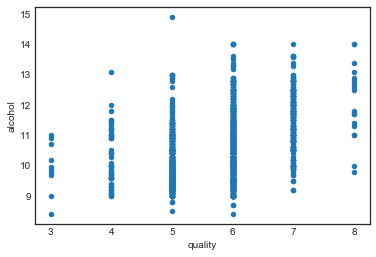

In [44]:
%matplotlib inline
df_wine.plot(kind='scatter',x='quality',y='alcohol')

## Practice:

#### We can see that the data is probably better fit for a box plot for a more concise view of the data. See if you can figure how to get a boxplot using the pandas documentation and what you have learned so far

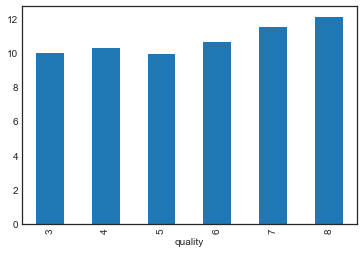

In [52]:
%matplotlib inline
df_wine.groupby([df_wine.quality]).mean().alcohol.plot(kind='bar', y='alcohol')